In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"3263f89a-7d51-4e89-8eff-fe495914a79a\"")

In [ ]:
hex_project_name = _hex_json.loads("\"WFK Performance Report 2023\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:


pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:


pip install QuantStats

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"qs\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import quantstats as qs

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"url\",\"df\",\"cumulative_return\",\"drawdown\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# specify the file path
url = "https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeOpen2Open.csv"
df = pd.read_csv(url)

# create a new column 'Profit'
df['Profit'] = ""

# calculate the profit based on the 'Signal' column
df.loc[df['Signal'] == 'Buy', 'Profit'] = (df['OpenExitPrice'] - df['OpenPrice']) * 1000
df.loc[df['Signal'] == 'Short', 'Profit'] = (df['OpenPrice'] - df['OpenExitPrice']) * 1000

#using 40k ($6000 margin) to based 15% Margin to equity
df['CumPL'] = 40000 + df['Profit'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

# Create a new column called 'returnPerc'
df['rtnPerc'] = df['CumPL'].pct_change()

# Set the first value of 'returnPerc' to fill NaN
df.at[df.index[0], 'rtnPerc'] = -0.025

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the drawdown
cumulative_return = (1 + df['rtnPerc']).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Add a new column for drawdown
df['Drawdown'] = -drawdown



df.head(20)

# 
 Signal 
 OpenPrice 
 Exit Date/Time 
 OpenExitPrice 
 Profit 
 CumPL 
 rtnPerc 
 Drawdown 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2013-05-28 
 1 
 Buy 
 103.54 
 5/30/2013 0:00 
 102.54 
 -1000.0 
 39000.0 
 -0.025000 
 -0.000000 
 
 
 2013-05-30 
 2 
 Short 
 102.54 
 6/7/2013 0:00 
 104.37 
 -1830.0 
 37170.0 
 -0.046923 
 -0.046923 
 
 
 2013-06-07 
 3 
 Buy 
 104.37 
 6/24/2013 0:00 
 103.23 
 -1140.0 
 36030.0 
 -0.030670 
 -0.076154 
 
 
 2013-06-24 
 4 
 Short 
 103.23 
 6/28/2013 0:00 
 106.19 
 -2960.0 
 33070.0 
 -0.082154 
 -0.152051 
 
 
 2013-06-28 
 5 
 Buy 
 106.19 
 7/31/2013 0:00 
 112.66 
 6470.0 
 39540.0 
 0.195646 
 -0.000000 
 
 
 2013-07-31 
 6 
 Short 
 112.66 
 8/1/2013 0:00 
 114.77 
 -2110.0 
 37430.0 
 -0.053364 
 -0.053364 
 
 
 2013-08-01 
 7 
 Buy 
 114.77 
 8/8/2013 0:00 
 113.69 
 -1080.0 
 36350.0 
 -0.028854 
 -0.080678 
 
 
 2013-08-08 
 8 
 Short 
 113.69 
 8/13/2013 0:00 
 115.66 
 -1970.0 
 34380.0 
 -0.054195 
 -0.130501 
 
 
 2013-08-13 
 9 
 Buy 
 115.66 
 8/22/2013 0:00 
 113.51 
 -2150.0 
 32230.0 
 -0.062536 
 -0.184876 
 
 
 2013-08-22 
 10 
 Short 
 113.51 
 8/26/2013 0:00 
 116.56 
 -3050.0 
 29180.0 
 -0.094632 
 -0.262013 
 
 
 2013-08-26 
 11 
 Buy 
 116.56 
 9/17/2013 0:00 
 115.87 
 -690.0 
 28490.0 
 -0.023646 
 -0.279464 
 
 
 2013-09-17 
 12 
 Short 
 115.87 
 12/4/2013 0:00 
 106.30 
 9570.0 
 38060.0 
 0.335907 
 -0.037430 
 
 
 2013-12-04 
 13 
 Buy 
 106.30 
 1/3/2014 0:00 
 104.58 
 -1720.0 
 36340.0 
 -0.045192 
 -0.080931 
 
 
 2014-01-03 
 14 
 Short 
 104.58 
 1/23/2014 0:00 
 105.66 
 -1080.0 
 35260.0 
 -0.029719 
 -0.108245 
 
 
 2014-01-23 
 15 
 Buy 
 105.66 
 3/11/2014 0:00 
 110.24 
 4580.0 
 39840.0 
 0.129892 
 -0.000000 
 
 
 2014-03-11 
 16 
 Short 
 110.24 
 3/27/2014 0:00 
 110.42 
 -180.0 
 39660.0 
 -0.004518 
 -0.004518 
 
 
 2014-03-27 
 17 
 Buy 
 110.42 
 4/28/2014 0:00 
 111.54 
 1120.0 
 40780.0 
 0.028240 
 -0.000000 
 
 
 2014-04-28 
 18 
 Short 
 111.54 
 5/14/2014 0:00 
 112.96 
 -1420.0 
 39360.0 
 -0.034821 
 -0.034821 
 
 
 2014-05-14 
 19 
 Buy 
 112.96 
 7/3/2014 0:00 
 116.18 
 3220.0 
 42580.0 
 0.081809 
 -0.000000 
 
 
 2014-07-03 
 20 
 Short 
 116.18 
 7/23/2014 0:00 
 115.05 
 1130.0 
 43710.0 
 0.026538 
 -0.000000

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_return\",\"drawdown\",\"average_drawdown\",\"drawdown_duration\",\"recovery_factor\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -4.50%
Average drawdown duration: 32 days
Recovery factor: 16.25


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"total_return\",\"num_years\",\"cagr\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: 18.49%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"monthly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Display the monthly returns as a DataFrame
monthly_returns_df = pd.DataFrame({'Monthly Return': monthly_returns * 100})
print(monthly_returns_df.tail(50))

            Monthly Return
Date                      
2019-02-28        5.782221
2019-03-31        0.000000
2019-04-30        0.000000
2019-05-31        1.922095
2019-06-30       -0.426038
2019-07-31        0.339772
2019-08-31       -4.684267
2019-09-30        0.947368
2019-10-31        0.690824
2019-11-30        0.000000
2019-12-31       -1.016181
2020-01-31        4.047603
2020-02-29       18.577174
2020-03-31        0.000000
2020-04-30        0.000000
2020-05-31        7.467670
2020-06-30        0.000000
2020-07-31       -0.601667
2020-08-31       -0.104193
2020-09-30        0.034767
2020-10-31       -0.397200
2020-11-30        9.575794
2020-12-31        0.000000
2021-01-31        0.000000
2021-02-28        0.000000
2021-03-31       -1.446638
2021-04-30        0.212334
2021-05-31        1.404883
2021-06-30        0.000000
2021-07-31       -1.485351
2021-08-31        5.362412
2021-09-30        0.000000
2021-10-31        0.000000
2021-11-30       -0.669555
2021-12-31       10.815931
2

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"yearly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Display the yearly returns as a DataFrame
yearly_returns_df = pd.DataFrame({'Yearly Return': yearly_returns * 100})
print(yearly_returns_df.head(11))

            Yearly Return
Date                     
2013-12-31            NaN
2014-12-31     133.819483
2015-12-31      16.499941
2016-12-31      15.405597
2017-12-31       8.569678
2018-12-31      16.383133
2019-12-31       5.943886
2020-12-31      43.738966
2021-12-31      14.425439
2022-12-31     -15.695941
2023-12-31      -3.640651


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"best_month\",\"best_month_return\",\"worst_month\",\"worst_month_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Find the best and worst performing months
best_month = monthly_returns.idxmax().strftime('%B %Y')
best_month_return = monthly_returns.max() * 100
worst_month = monthly_returns.idxmin().strftime('%B %Y')
worst_month_return = monthly_returns.min() * 100

# Display the results
print(f"Best performing month: {best_month}, Return: {best_month_return:.2f}%")
print(f"Worst performing month: {worst_month}, Return: {worst_month_return:.2f}%")

Best performing month: October 2014, Return: 93.38%
Worst performing month: August 2013, Return: -23.88%


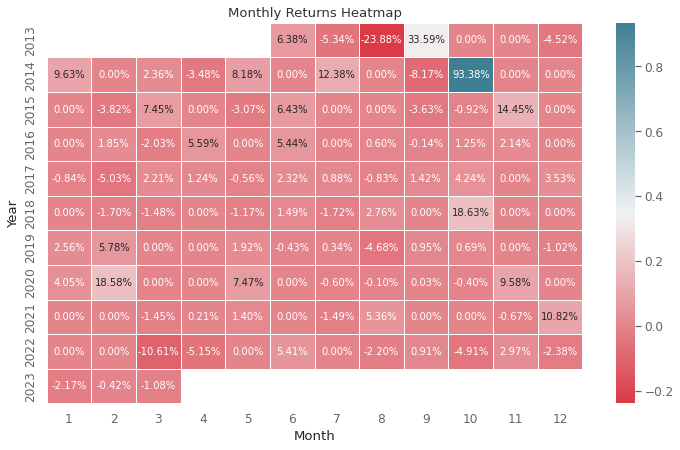

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"sns\",\"plt\",\"monthly_returns\",\"monthly_returns_pivot\",\"fig\",\"ax\",\"cmap\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import seaborn as sns
import matplotlib.pyplot as plt
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Create a pivot table of monthly returns
monthly_returns_pivot = monthly_returns.reset_index().pivot_table(index=monthly_returns.index.year, columns=monthly_returns.index.month, values='CumPL')

# Create heatmap
fig, ax = plt.subplots(figsize=(12,7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(monthly_returns_pivot, annot=True, fmt=".2%", linewidths=0.5, ax=ax, cmap=cmap)
plt.title('Monthly Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"best_years\",\"worst_years\",\"year\",\"return_\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Find the best and worst performing years
best_years = yearly_returns.sort_values(ascending=False).head(3)
worst_years = yearly_returns.sort_values().head(3)

# Display the results
print("Best performing years:")
for year, return_ in best_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

print("\nWorst performing years:")
for year, return_ in worst_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

Best performing years:
- Year: 2014, Return: 133.82%
- Year: 2020, Return: 43.74%
- Year: 2015, Return: 16.50%

Worst performing years:
- Year: 2022, Return: -15.70%
- Year: 2023, Return: -3.64%
- Year: 2019, Return: 5.94%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"quarterly_returns\",\"yearly_returns\",\"positive_months\",\"positive_quarters\",\"positive_years\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly, quarterly, and yearly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()
quarterly_returns = df['CumPL'].resample('Q').last().pct_change()
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Calculate percentage of positive months, quarters, and years
positive_months = (monthly_returns > 0).mean() * 100
positive_quarters = (quarterly_returns > 0).mean() * 100
positive_years = (yearly_returns > 0).mean() * 100

#Display the results
print(f"Percentage of positive months: {positive_months:.2f}%")
print(f"Percentage of positive quarters: {positive_quarters:.2f}%")
print(f"Percentage of positive years: {positive_years:.2f}%")

Percentage of positive months: 36.97%
Percentage of positive quarters: 60.00%
Percentage of positive years: 72.73%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"top_10_drawdowns\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

  Start Date  Drawdown (%)
0 2013-08-26    -27.946383
1 2013-08-22    -26.201315
2 2023-03-03    -18.765157
3 2022-04-26    -18.622033
4 2013-08-13    -18.487607
5 2023-02-01    -17.874607
6 2023-01-05    -17.711605
7 2023-01-13    -17.524749
8 2022-10-27    -16.129289
9 2022-04-18    -16.025921


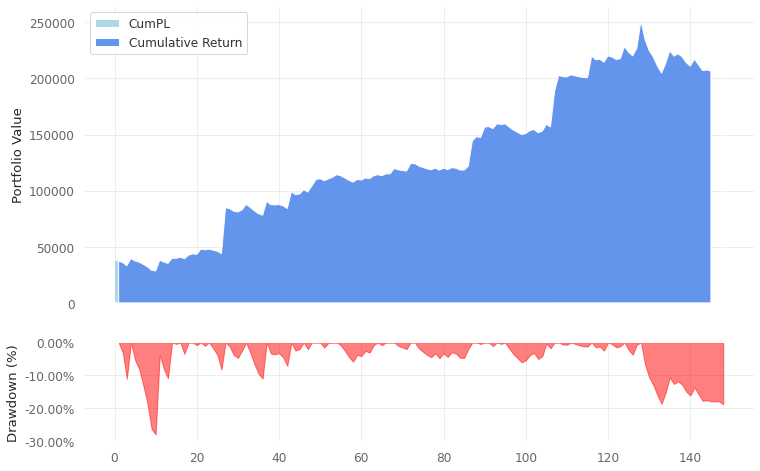

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"plt\",\"cumulative_return\",\"drawdown\",\"fig\",\"ax\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"np\",\"plt\",\"norm\",\"daily_returns\",\"cumulative_return\",\"average_daily_return\",\"std_daily_return\",\"annualized_volatility\",\"sharpe_ratio\",\"sortino_ratio\",\"var_95\",\"daily_var_95\",\"average_monthly_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")




Cumulative return: 423.92%
Average daily return: 1.44%
Daily return volatility: 9.36%
Annualized volatility: 148.55%
Sharpe ratio: 2.44
Sortino ratio: 12.80
95% VaR (1 day): -28505.94
Daily VaR (95%, 1 day): 191.32
Average monthly return: 1.12%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date', 'rtnPerc']]

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)


df.head()


rtnPerc 
 
 
 Date 
 
 
 
 
 
 2013-05-28 
 -0.025000 
 
 
 2013-05-30 
 -0.046923 
 
 
 2013-06-07 
 -0.030670 
 
 
 2013-06-24 
 -0.082154 
 
 
 2013-06-28 
 0.195646

Performance Metrics

                           Strategy
-------------------------  ----------
Start Period               2013-05-28
End Period                 2023-03-03
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          410.83%
CAGR﹪                     18.17%

Sharpe                     2.41
Prob. Sharpe Ratio         99.96%
Smart Sharpe               2.2
Sortino                    10.94
Smart Sortino              10.01
Sortino/√2                 7.74
Smart Sortino/√2           7.08
Omega                      2.2

Max Drawdown               -27.95%
Longest DD Days            352
Volatility (ann.)          148.13%
Calmar                     0.65
Skew                       7.03
Kurtosis                   64.8

Expected Daily %           1.1%
Expected Monthly %         2.01%
Expected Yearly %          15.98%
Kelly Criterion            22.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -13.93%
Expected Shortfall (cVaR)  -13.93%

Max Consecutive Wins  

None

5 Worst Drawdowns

Start 
 Valley 
 End 
 Days 
 Max Drawdown 
 99% Max Drawdown 
 
 
 
 
 1 
 2013-07-31 
 2013-08-26 
 2014-01-23 
 176 
 -27.946383 
 -26.201315 
 
 
 2 
 2022-03-16 
 2023-03-03 
 2023-03-03 
 352 
 -18.765157 
 -18.622033 
 
 
 3 
 2013-05-30 
 2013-06-24 
 2013-06-28 
 29 
 -15.205128 
 -7.615385 
 
 
 4 
 2015-05-20 
 2015-06-10 
 2015-06-26 
 37 
 -10.989637 
 -9.475003 
 
 
 5 
 2014-09-18 
 2014-09-25 
 2014-10-02 
 14 
 -8.228906 
 -3.738513

Strategy Visualization

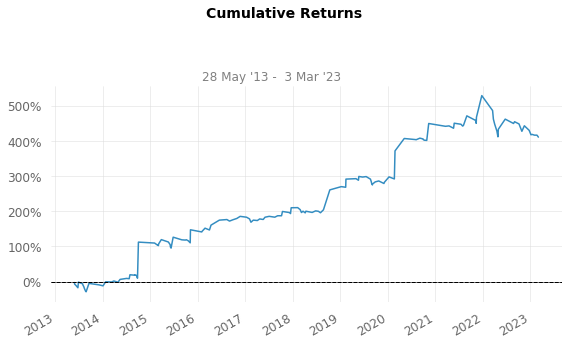

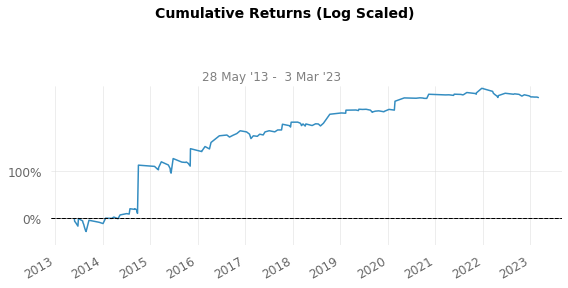

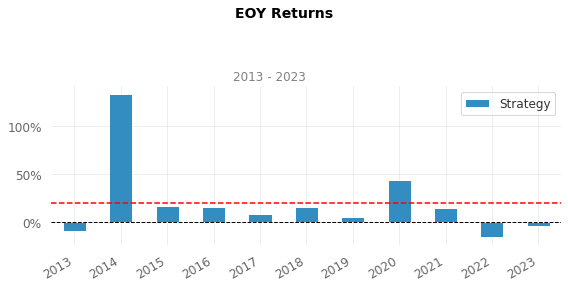

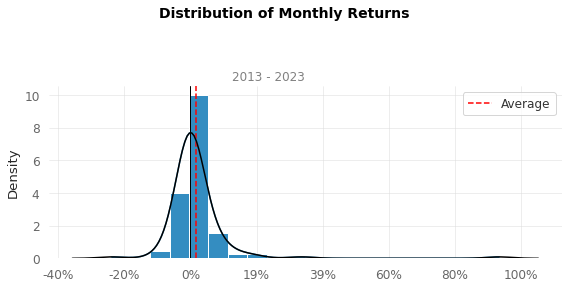

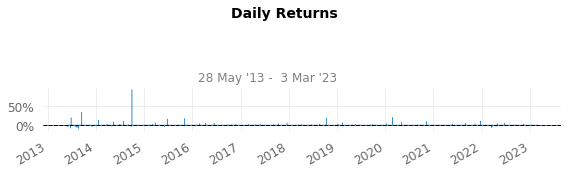

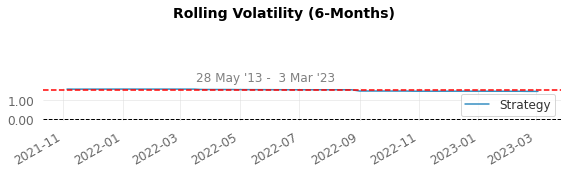

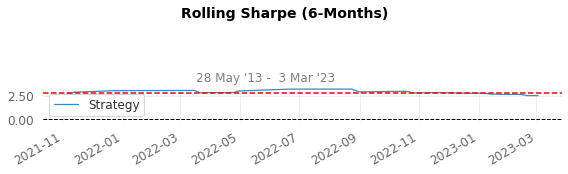

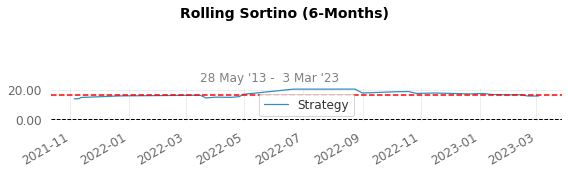

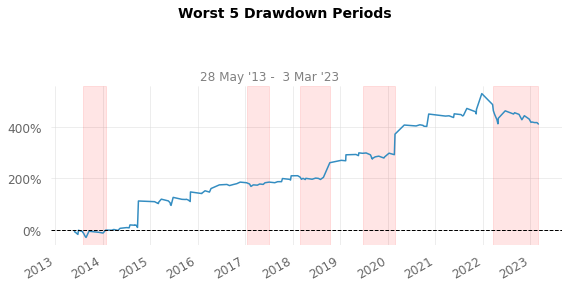

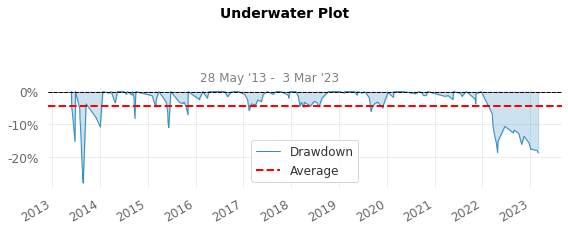

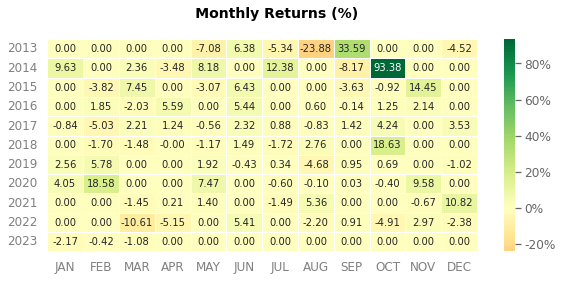

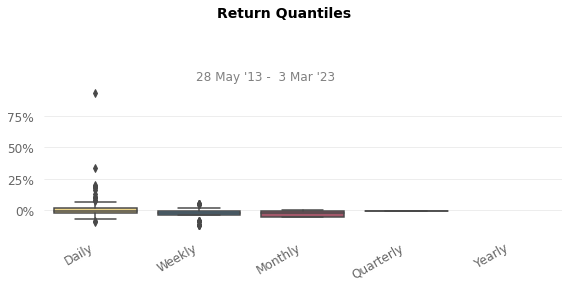

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"series\",\"df\",\"pd\",\"df\",\"qs\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

#Convert dataframe to a series
series = pd.Series(df.rtnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index()

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"url\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# specify the file path
url = "https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeOpen2Open.csv"
df = pd.read_csv(url)